<div>
<h1>Solve Xporters traffic volume problem</h1>
<em><font size="-2">Organisers : Alexis de Russ&eacute;, Florian Bertelli, Gaspard Donada--Vidal, Ghassen Chaabane, Moez Ezzeddine, Ziheng Li</font></em>
<hr>
<figure><img src="logo.jpg", width=300, border=20 style="float:left;margin:5px"></figure>
<p><br>This code was tested with Python 3.7 |Anaconda custom (64-bit)| (Oct 01 2019, 11:07:29) (<a href="https://anaconda.org/">https://anaconda.org/</a>).<br>
<font size="-3">ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</font></p></div>

<div>
    <h2>Introduction </h2>
    <p>
With globalization, our world tends to be more and more connected, so this implies more and more transport. There
 are various types of transports: transports of goods, energy, information, or people.This century will be marked by a revolution in the transport of people. With the development of autonomous cars, more and more data will be collected: speed, location, population,etc. The challenge is to get value from this. As the number of cars, and particularly autonomous cars tends to grow, we'll need to deal with an increasing traffic flow to avoid huge traffic jams. Indeed, some experts pretend that autonomous vehicles will be able to reduce travelling timeup to 30%, even if the world traffic increases of 10%.
But how is it possible to reduce travelling time and traffic jams if the number of vehicles increases ? Thanks to prediction. <br>
        In fact, prediction will be the key to determine the fastest way to get you from your home to your work, without getting in traffic jams. Predictions may also be used to determine which transportation infrastructures to
build.
            <p>
Xporters challenge is a small standard multivariable regression data set from the <a href="http://archive.ics.uci.edu/ml/datasets/">UCI Machine Learning Repository</a>, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features


In [1]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
model_dir = './sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = './sample_result_submission/' 
problem_dir = './ingestion_program/'  
score_dir = './scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
</div>

In [3]:
from data_io import read_as_df
#data_dir = 'input_data'        # Change this to the directory where you put the input data
data_dir = './all_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!pwd
!ls $data_dir*

/Users/shuangruichen/PycharmProjects/MiniProject/starting_kit
xporters_feat.name      xporters_test.data      xporters_valid.data
xporters_private.info   xporters_train.data
xporters_public.info    xporters_train.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [4]:
data = read_as_df(data_dir  + '/' + data_name)             # The data are loaded as a Pandas Data Frame

Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


In [7]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
0,0,267.510,0.0,0.0,40,85.821965,6,1,12,2017,...,0,0,0,0,0,0,0,0,0,759.0
1,0,293.720,0.0,0.0,90,72.271517,5,11,6,2018,...,0,0,0,0,0,0,0,0,0,4085.0
2,0,302.180,0.0,0.0,0,65.922514,1,19,7,2013,...,0,0,0,0,0,0,0,0,0,3528.0
3,0,255.580,0.0,0.0,75,90.673493,1,5,2,2014,...,0,0,0,0,0,0,0,0,0,2636.0
4,0,286.381,0.0,0.0,0,97.325080,2,18,10,2016,...,0,0,0,0,0,0,0,0,0,4226.0


In [56]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,...,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,38563.000000
mean,1.474040e-17,-2.037430e-13,-2.469018e-17,7.370202e-19,5.527651e-17,-2.259243e-14,-2.579571e-17,8.659987e-18,-7.858478e-17,1.503669e-14,...,-4.790631e-18,-2.745400e-17,-2.045231e-17,-1.289785e-18,-1.842550e-18,9.212752e-19,-2.579571e-18,-2.763826e-17,2.303188e-18,3258.740788
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1987.121630
min,-3.530206e-02,-2.123861e+01,-7.570562e-03,-2.664108e-02,-1.264421e+00,-4.138441e+00,-1.489668e+00,-1.642164e+00,-1.620091e+00,-1.855390e+00,...,-1.836343e-02,-7.762822e-02,-5.021595e-02,-7.201703e-03,-3.417974e-02,-1.905688e-02,-3.455788e-02,-2.926522e-02,-2.037319e-02,0.000000
25%,-3.530206e-02,-6.826170e-01,-7.570562e-03,-2.664108e-02,-1.238799e+00,-6.740736e-01,-9.905019e-01,-9.224583e-01,-7.392890e-01,-7.983821e-01,...,-1.836343e-02,-7.762822e-02,-5.021595e-02,-7.201703e-03,-3.417974e-02,-1.905688e-02,-3.455788e-02,-2.926522e-02,-2.037319e-02,1195.000000
50%,-3.530206e-02,8.634452e-02,-7.570562e-03,-2.664108e-02,3.753454e-01,5.480743e-03,7.831231e-03,-5.881123e-02,1.415127e-01,2.586262e-01,...,-1.836343e-02,-7.762822e-02,-5.021595e-02,-7.201703e-03,-3.417974e-02,-1.905688e-02,-3.455788e-02,-2.926522e-02,-2.037319e-02,3377.000000
75%,-3.530206e-02,8.000187e-01,-7.570562e-03,-2.664108e-02,1.041500e+00,6.696455e-01,1.006164e+00,8.048359e-01,7.287139e-01,7.871303e-01,...,-1.836343e-02,-7.762822e-02,-5.021595e-02,-7.201703e-03,-3.417974e-02,-1.905688e-02,-3.455788e-02,-2.926522e-02,-2.037319e-02,4933.000000
max,2.832623e+01,2.180690e+00,1.963317e+02,6.706090e+01,1.297714e+00,4.841961e+00,1.505331e+00,1.668483e+00,1.609516e+00,1.315634e+00,...,5.445464e+01,1.288158e+01,1.991347e+01,1.388524e+02,2.925634e+01,5.247312e+01,2.893621e+01,3.416936e+01,4.908284e+01,7260.000000


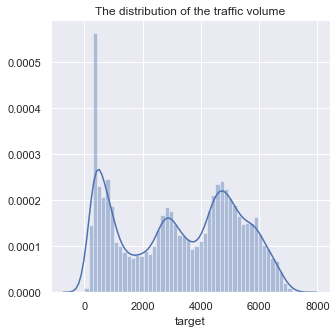

In [57]:
plt.figure(figsize = (5,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

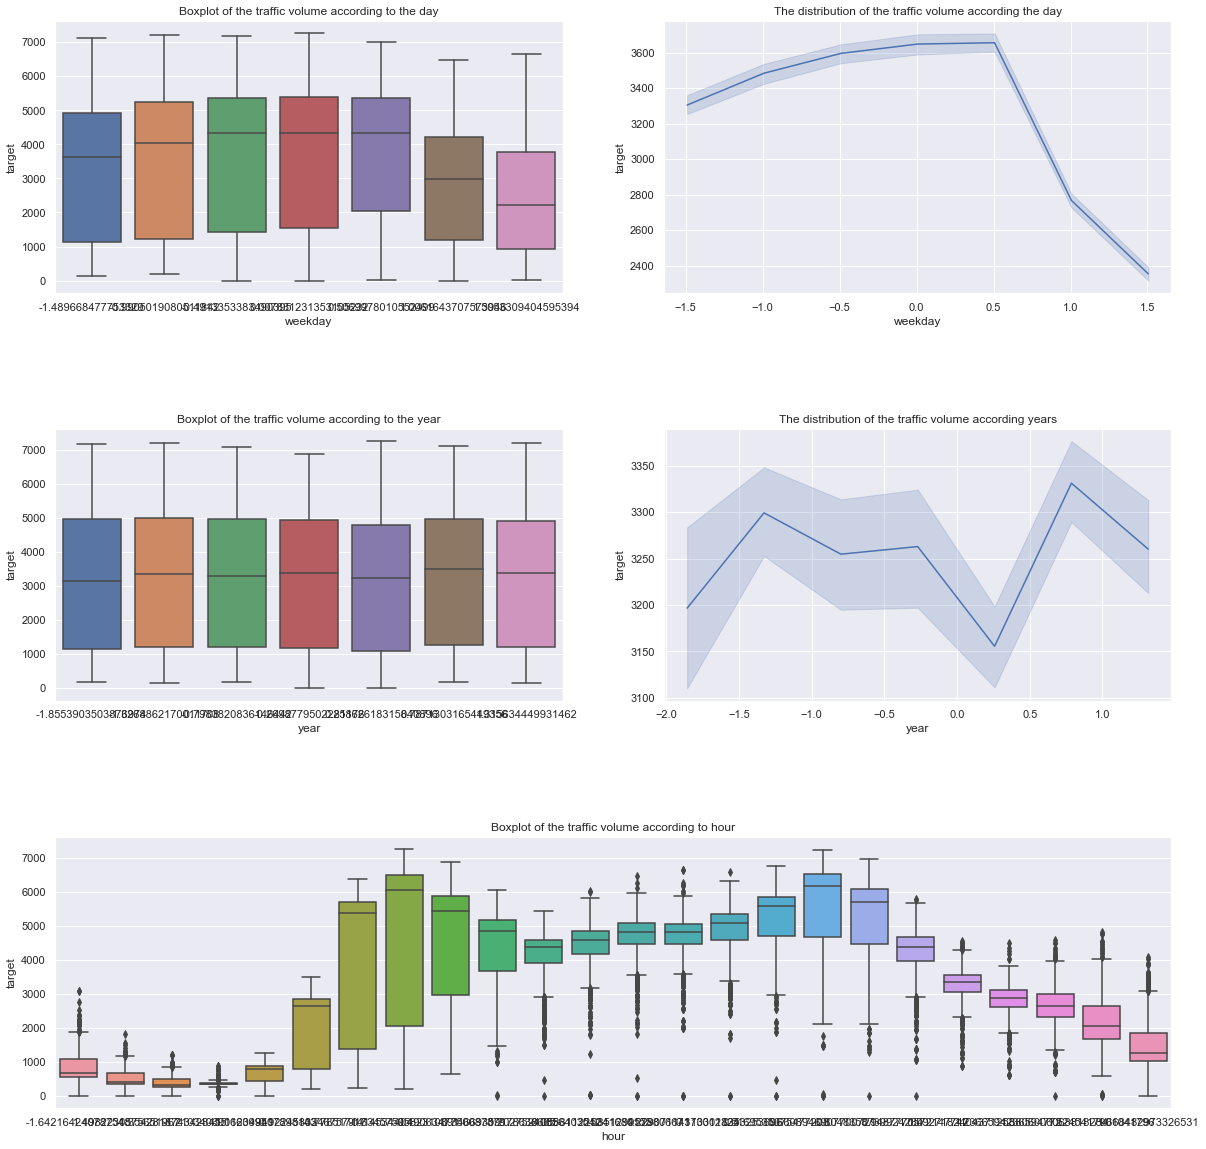

In [58]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

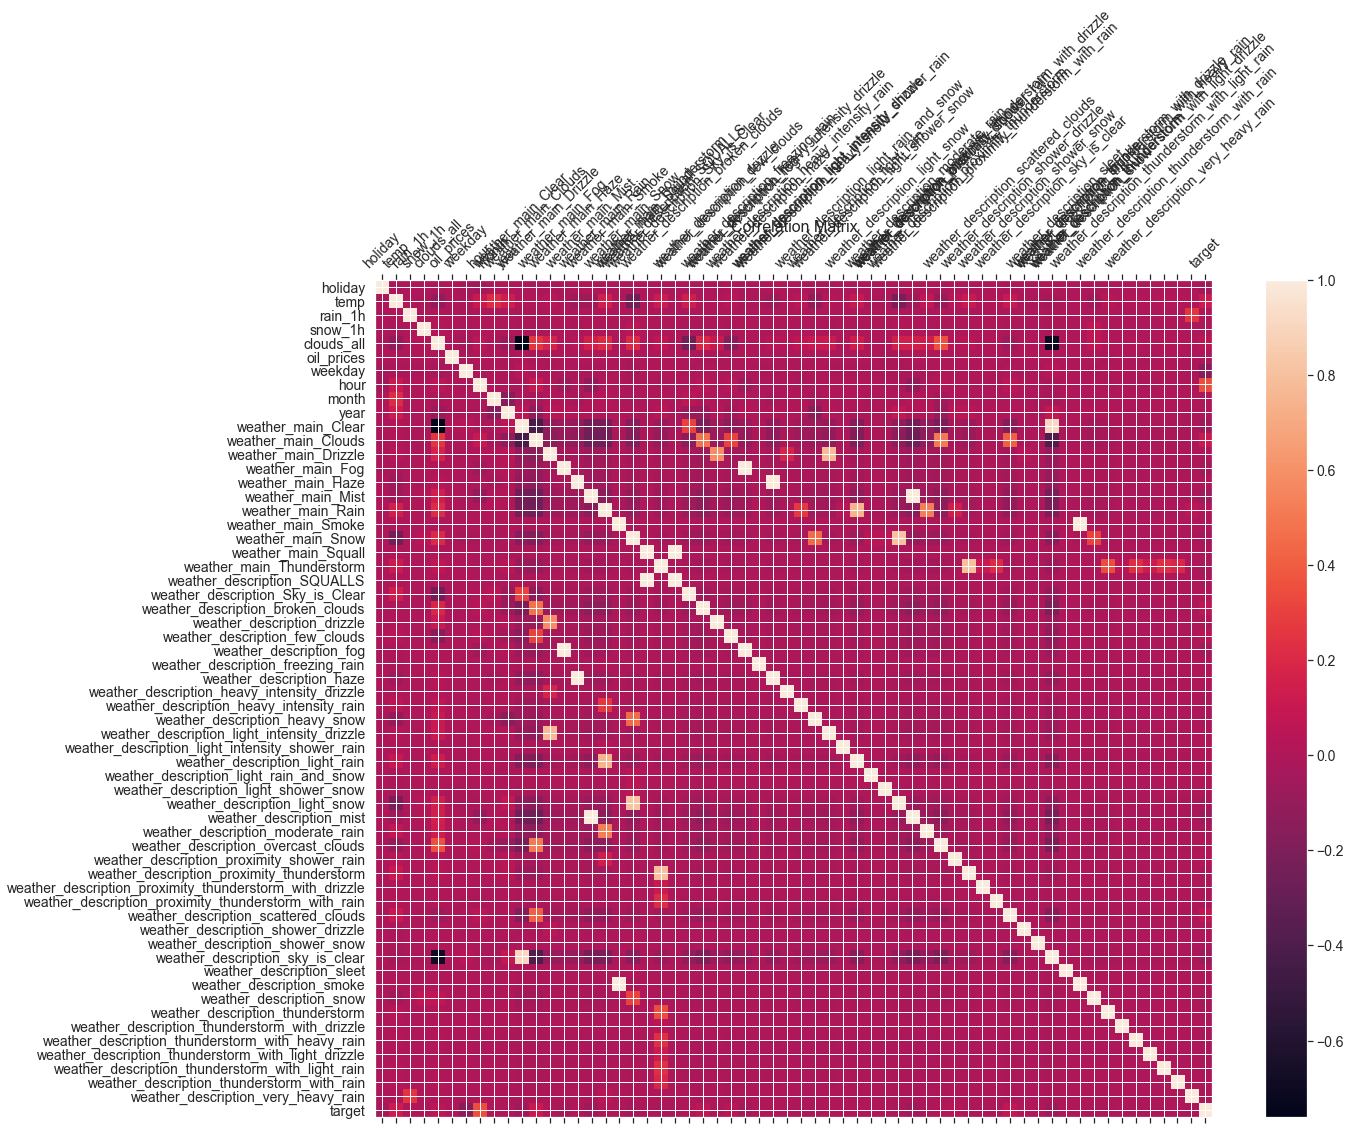

In [59]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [60]:
print('Most important features according to the correlation with target')
most_important_features = data.corr()['target'].sort_values(ascending=False)[:10]
print (data.corr()['target'].sort_values(ascending=False)[:10], '\n')

Most important features according to the correlation with target
target                                       1.000000
hour                                         0.350545
temp                                         0.131803
weather_main_Clouds                          0.119544
weather_description_scattered_clouds         0.083946
weather_description_broken_clouds            0.065639
clouds_all                                   0.064201
weather_description_few_clouds               0.044360
weather_description_proximity_shower_rain    0.034044
weather_main_Haze                            0.019314
Name: target, dtype: float64 



In [83]:
columns_list = ['hour','temp','weather_main_Clouds','weather_description_scattered_clouds','weather_description_broken_clouds','clouds_all','weather_description_few_clouds','target']
data = data[columns_list]
data.describe()

,hour,temp,weather_main_Clouds,weather_description_scattered_clouds,weather_description_broken_clouds,clouds_all,weather_description_few_clouds,target
count,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,3.856300e+04,38563.000000
mean,8.659987e-18,-2.037430e-13,2.994145e-17,4.827482e-17,-4.458972e-17,5.527651e-17,-1.308211e-17,3258.740788
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1987.121630
min,-1.642164e+00,-2.123861e+01,-6.788361e-01,-2.779695e-01,-3.269387e-01,-1.264421e+00,-2.081193e-01,0.000000
25%,-9.224583e-01,-6.826170e-01,-6.788361e-01,-2.779695e-01,-3.269387e-01,-1.238799e+00,-2.081193e-01,1195.000000
50%,-5.881123e-02,8.634452e-02,-6.788361e-01,-2.779695e-01,-3.269387e-01,3.753454e-01,-2.081193e-01,3377.000000
75%,8.048359e-01,8.000187e-01,1.473071e+00,-2.779695e-01,-3.269387e-01,1.041500e+00,-2.081193e-01,4933.000000
max,1.668483e+00,2.180690e+00,1.473071e+00,3.597424e+00,3.058598e+00,1.297714e+00,4.804812e+00,7260.000000


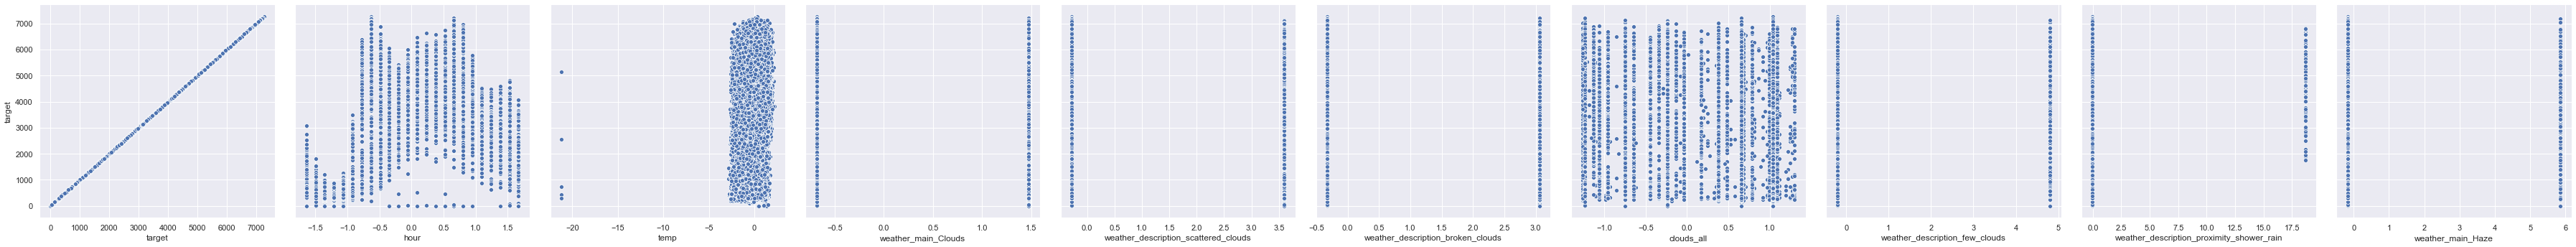

In [61]:
a = list(most_important_features.index)
sns.pairplot(data,height= 5, x_vars = a , y_vars = 'target')
plt.show()

<div>
<h1>Step 2: Building a predictive model</h1>
</div>

<div>
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

In [62]:
??DataManager

In [4]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)

Info file found : /Users/shuangruichen/PycharmProjects/MiniProject/starting_kit/all_data/xporters_public.info


<div>
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [5]:
from data_io import write
from model import model
from sklearn import linear_model
from sklearn.metrics import r2_score as sklearn_metric
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn import linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

<div>
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [9]:
M = model()
trained_model_name = model_dir + data_name
!pwd
# Uncomment the next line to re-load an already trained model
print(trained_model_name)
#M = M.load(trained_model_name)

/Users/shuangruichen/PycharmProjects/MiniProject/starting_kit
./sample_code_submission/xporters


<div>
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [10]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
X_valid = D.data['X_valid']
if not(M.is_trained) : M.fit(X_train, Y_train)                     
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

FIT: dim(X)= [38563, 59]
FIT: dim(y)= [38563, 1]
PREDICT: dim(X)= [38563, 59]
PREDICT: dim(y)= [38563, 1]
PREDICT: dim(X)= [4820, 59]
PREDICT: dim(y)= [4820, 1]
PREDICT: dim(X)= [4820, 59]
PREDICT: dim(y)= [4820, 1]


In [22]:
X_test_para = X_train[0:1000]
Y_test_para = Y_train[0:1000]

In [27]:
parameters = {'alpha':np.linspace(1,2000,40)}
classifier = linear_model.Ridge()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print(search.best_params_)

{'alpha': 411.05128205128204}


In [32]:
parameters = {'alpha':np.linspace(10,50,40)}
classifier = linear_model.Lasso()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print(search.best_params_)

{'alpha': 38.717948717948715}


In [36]:
parameters = {'alpha':np.linspace(1,3,10)}
classifier = linear_model.LassoLars(eps=0.001)
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print(search.best_params_)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 22 iterations, alpha=1.245e+00, previous alpha=1.238e+00, with an active set of 23 regressors.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 22 iterations, alpha=1.245e+00, previous alpha=1.238e+00, with an active set of 23 regressors.
  ConvergenceWarning)


{'alpha': 2.333333333333333}


In [49]:
parameters = {'max_depth':range(2,4)}
classifier = DecisionTreeRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print(search.best_params_)

{'max_depth': 3}


In [58]:
parameters = {'alpha':np.linspace(300,400,10)}
classifier = KernelRidge()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print(search.best_params_)

{'alpha': 344.44444444444446}


In [15]:
parameters = {'n_neighbors':range(2,10)}
classifier = KNeighborsRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print(search.best_params_)

{'n_neighbors': 5}


In [59]:
parameters = {'max_depth':range(8,13),'n_estimators':np.linspace(100,200,3,dtype=np.int16)}
classifier = RandomForestRegressor(random_state=1)
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print(search.best_params_)

{'max_depth': 9, 'n_estimators': 100}


In [60]:
voter1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
voter2 = RandomForestRegressor(random_state=1, n_estimators=10)
voter3 = LinearRegression()

model_list = [                                                      
    KNeighborsRegressor(4),                                          
    svm.SVR(),                                                      
    GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel(),random_state=0), 
    ElasticNet(random_state=0),                                      
    DecisionTreeRegressor(),                                     
    RandomForestRegressor(n_estimators=100),                     
    GradientBoostingRegressor(random_state=1, n_estimators=100),
    VotingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)]),
    GradientBoostingRegressor(random_state=2, n_estimators=100, max_features = 'auto',loss = 'huber',learning_rate = 0.1,criterion =  'friedman_mse')                                               #0.99          0.40
    ]

In [61]:
# Here we put all the best params for all classifier and put in the data from pre-processing data
nb_data = 1000 # Bad computer, takes too long to execute
nb_model = len(model_list)
Perf_tr = np.zeros([nb_model,1])
for i in range(nb_model):
    model_list[i].fit(X_train[0:nb_data],Y_train[0:nb_data])
    Ytrain_predicted = model_list[i].predict(X_train[0:nb_data])
    Perf_tr[i] = sklearn_metric(Y_train[0:nb_data], Ytrain_predicted)
pd.DataFrame(Perf_tr,columns=['model perf']).style.background_gradient(cmap='Blues')

,model perf
0,0.676716
1,6.01489e-06
2,0.0897689
3,0.174335
4,1
5,0.990885
6,0.947198
7,0.787907
8,0.939652


In [62]:
# Save and view the best result
import joblib
best = model_list[Perf_tr.argmax()]
joblib.dump(best,'res.pickle')
Y_hat_train = best.predict(X_train)
np.vstack((Y_hat_train,Y_train))

array([[ 759., 4085., 3528., ..., 6901., 4335., 6221.],
       [ 759., 4085., 3528., ..., 6591., 4366., 5240.]])

<div>
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [63]:
M.save(trained_model_name)               
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

./sample_result_submission/xporters_test.predict
./sample_result_submission/xporters_train.predict
./sample_result_submission/xporters_valid.predict


<div>
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [64]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
??scoring_function

Using scoring metric: r2_metric


<div>
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [65]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
# Here we think DecisionTreeRegressor might be the best option, but we can't still get a nice accuracy.
# We thought this might because we haven't found a better regressionor or it's because we havn't get a data from pre-processing groupe

Training score for the r2_metric metric = 0.8648
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

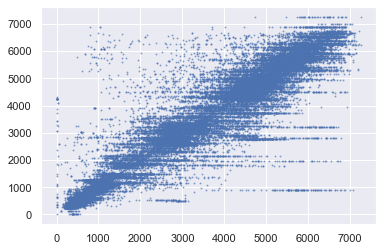

In [66]:
plt.scatter(Y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

<div>
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [67]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [30850, 59]
FIT: dim(y)= [30850, 1]
PREDICT: dim(X)= [7713, 59]
PREDICT: dim(y)= [7713, 1]
FIT: dim(X)= [30850, 59]
FIT: dim(y)= [30850, 1]
PREDICT: dim(X)= [7713, 59]
PREDICT: dim(y)= [7713, 1]
FIT: dim(X)= [30850, 59]
FIT: dim(y)= [30850, 1]
PREDICT: dim(X)= [7713, 59]
PREDICT: dim(y)= [7713, 1]
FIT: dim(X)= [30851, 59]
FIT: dim(y)= [30851, 1]
PREDICT: dim(X)= [7712, 59]
PREDICT: dim(y)= [7712, 1]
FIT: dim(X)= [30851, 59]
FIT: dim(y)= [30851, 1]
PREDICT: dim(X)= [7712, 59]
PREDICT: dim(y)= [7712, 1]

CV score (95 perc. CI): -2.69 (+/- 0.06)


<div>
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [68]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

/bin/sh: activate: No such file or directory


<div>
Also test the scoring program:
    </div>

In [69]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

/bin/sh: activate: No such file or directory


<div>
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)